In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Nathan\Documents\WGU\D600\Code\Task 1\D600 Task 1 Dataset 1 Housing Information.csv")

In [2]:
columns = ['Price', 'SquareFootage', 'BackyardSpace', 'NumBedrooms', 'CrimeRate', 'AgeOfHome', 'Floors']
stats = df[columns].describe()
print(stats)

              Price  SquareFootage  BackyardSpace  NumBedrooms    CrimeRate  \
count  7.000000e+03    7000.000000    7000.000000  7000.000000  7000.000000   
mean   3.072820e+05    1048.947459     511.507029     3.008571    31.226194   
std    1.501734e+05     426.010482     279.926549     1.021940    18.025327   
min    8.500000e+04     550.000000       0.390000     1.000000     0.030000   
25%    1.921075e+05     660.815000     300.995000     2.000000    17.390000   
50%    2.793230e+05     996.320000     495.965000     3.000000    30.385000   
75%    3.918781e+05    1342.292500     704.012500     4.000000    43.670000   
max    1.046676e+06    2874.700000    1631.360000     7.000000    99.730000   

         AgeOfHome      Floors  
count  7000.000000  7000.00000  
mean     46.797046     1.16300  
std      31.779701     0.37209  
min       0.010000     1.00000  
25%      20.755000     1.00000  
50%      42.620000     1.00000  
75%      67.232500     1.00000  
max     178.680000     3

In [3]:
percentages_floors = df['Floors'].value_counts(normalize=True).reset_index()
percentages_floors.columns = ['Floors', 'Percentage']
percentages_floors['Percentage'] *= 100

percentages_numbedrooms = df['NumBedrooms'].value_counts(normalize=True).reset_index()
percentages_numbedrooms.columns = ['NumBedrooms', 'Percentage']
percentages_numbedrooms['Percentage'] *= 100

print("Floors Percentages:")
print(percentages_floors)

print("NumBedrooms Percentages:")
print(percentages_numbedrooms)

Floors Percentages:
   Floors  Percentage
0       1        83.8
1       2        16.1
2       3         0.1
NumBedrooms Percentages:
   NumBedrooms  Percentage
0            3   38.028571
1            4   24.828571
2            2   23.785714
3            1    6.842857
4            5    6.057143
5            6    0.442857
6            7    0.014286


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

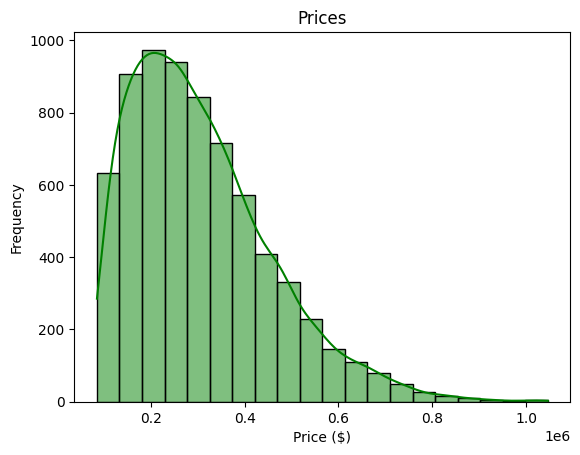

In [5]:
sns.histplot(df['Price'], bins=20, kde=True, color='green')

plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.title("Prices")

plt.show()

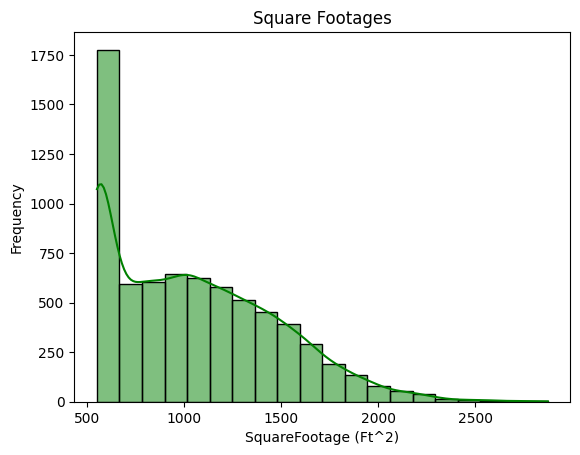

In [6]:
sns.histplot(df['SquareFootage'], bins=20, kde=True, color='green')

plt.xlabel("SquareFootage (Ft^2)")
plt.ylabel("Frequency")
plt.title("Square Footages")

plt.show()

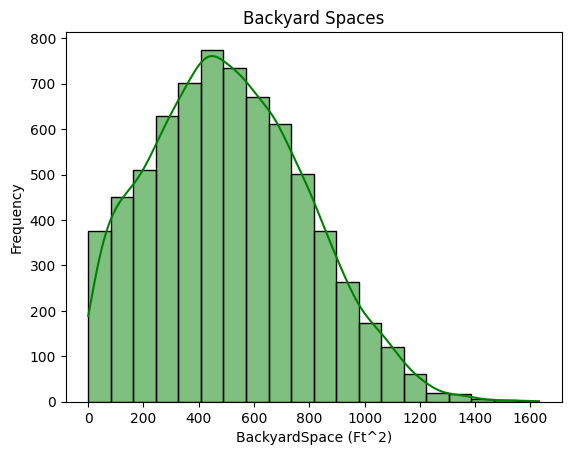

In [7]:
sns.histplot(df['BackyardSpace'], bins=20, kde=True, color='green')

plt.xlabel("BackyardSpace (Ft^2)")
plt.ylabel("Frequency")
plt.title("Backyard Spaces")

plt.show()

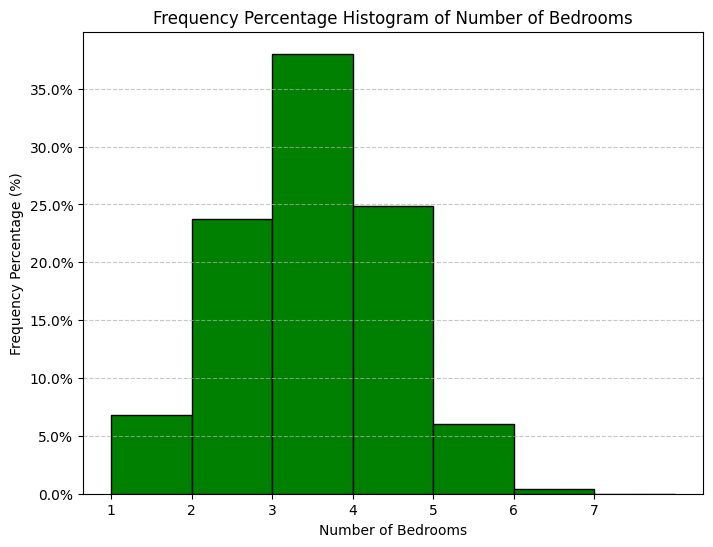

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(df['NumBedrooms'], bins=range(df['NumBedrooms'].min(), df['NumBedrooms'].max() + 2), 
         edgecolor='black', color='green', density=True)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Frequency Percentage (%)")
plt.title("Frequency Percentage Histogram of Number of Bedrooms")
plt.xticks(range(df['NumBedrooms'].min(), df['NumBedrooms'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.1f}%'))

plt.show()

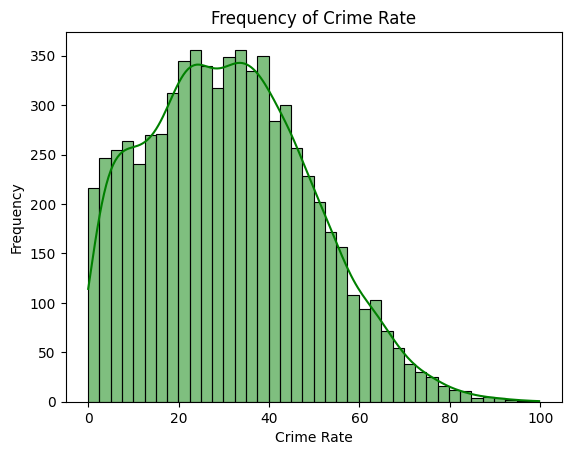

In [9]:
sns.histplot(df['CrimeRate'], bins=40, kde=True, color='green')

plt.xlabel("Crime Rate")
plt.ylabel("Frequency")
plt.title("Frequency of Crime Rate")

plt.show()

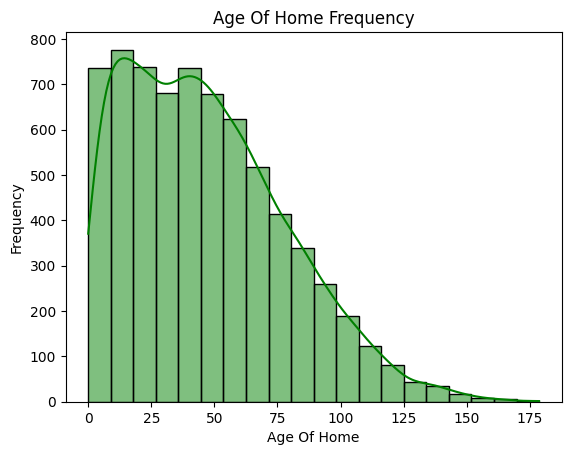

In [10]:
sns.histplot(df['AgeOfHome'], bins=20, kde=True, color='green')

plt.xlabel("Age Of Home")
plt.ylabel("Frequency")
plt.title("Age Of Home Frequency")

plt.show()

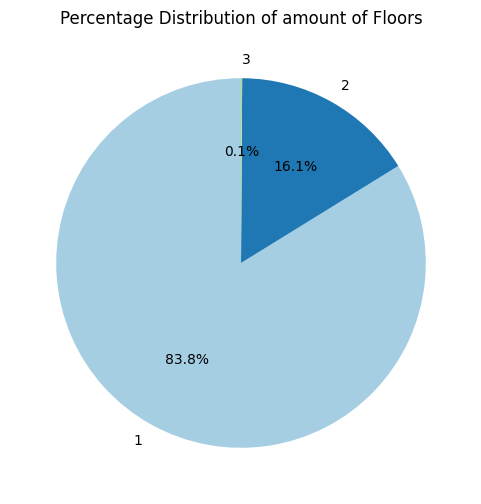

In [11]:
floor_counts = df['Floors'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
plt.pie(floor_counts, labels=floor_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title("Percentage Distribution of amount of Floors")
plt.show()

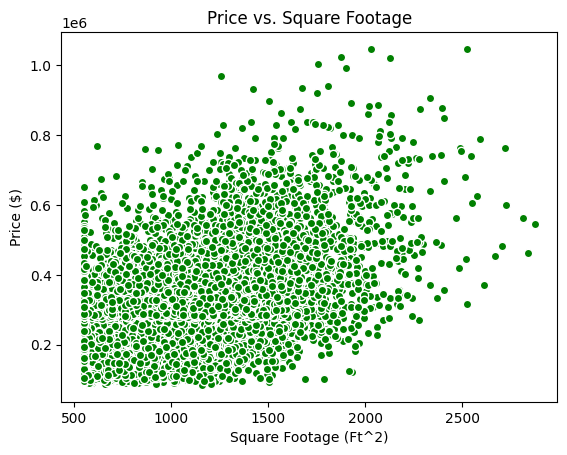

In [12]:
plt.scatter(df['SquareFootage'], df['Price'], color='green', edgecolor='white')
plt.xlabel("Square Footage (Ft^2)")
plt.ylabel("Price ($)")
plt.title("Price vs. Square Footage")
plt.show()

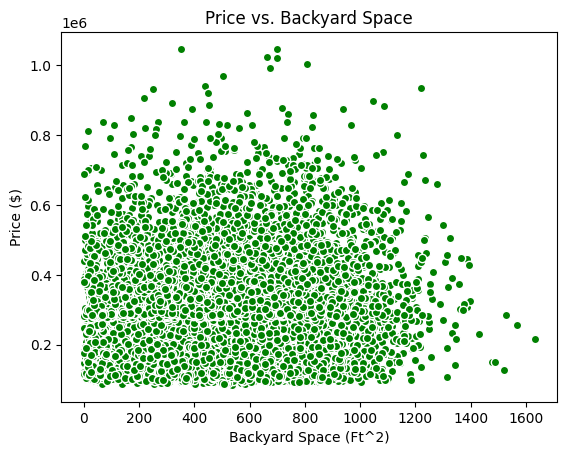

In [13]:
plt.scatter(df['BackyardSpace'], df['Price'], color='green', edgecolor='white')
plt.xlabel("Backyard Space (Ft^2)")
plt.ylabel("Price ($)")
plt.title("Price vs. Backyard Space")
plt.show()

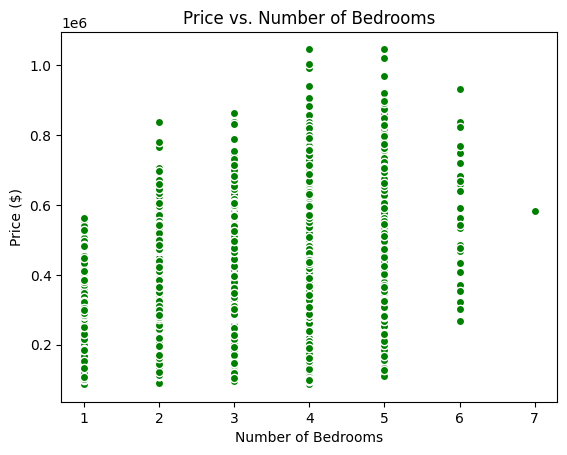

In [14]:
plt.scatter(df['NumBedrooms'], df['Price'], color='green', edgecolor='white')
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price ($)")
plt.title("Price vs. Number of Bedrooms")
plt.show()

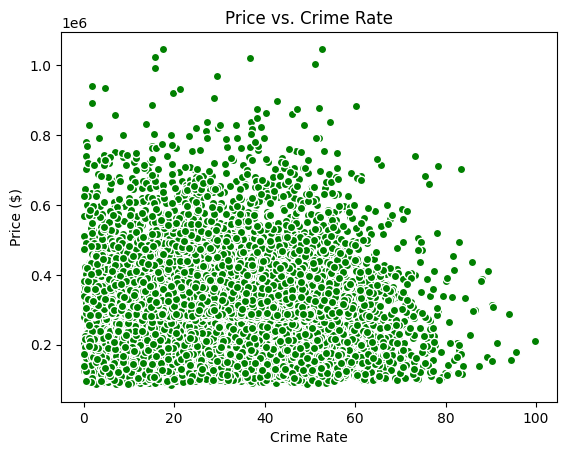

In [15]:
plt.scatter(df['CrimeRate'], df['Price'], color='green', edgecolor='white')
plt.xlabel("Crime Rate")
plt.ylabel("Price ($)")
plt.title("Price vs. Crime Rate")
plt.show()

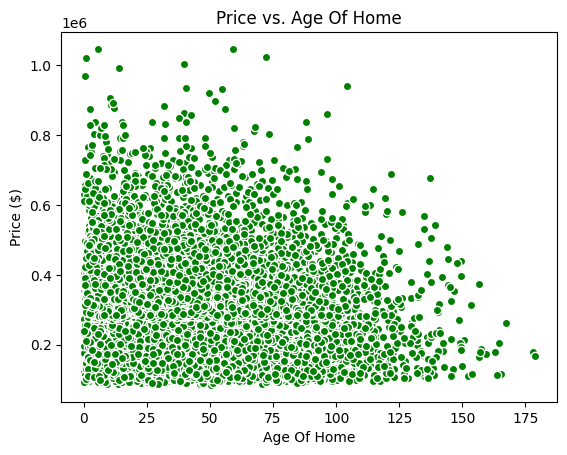

In [16]:
plt.scatter(df['AgeOfHome'], df['Price'], color='green', edgecolor='white')
plt.xlabel("Age Of Home")
plt.ylabel("Price ($)")
plt.title("Price vs. Age Of Home")
plt.show()

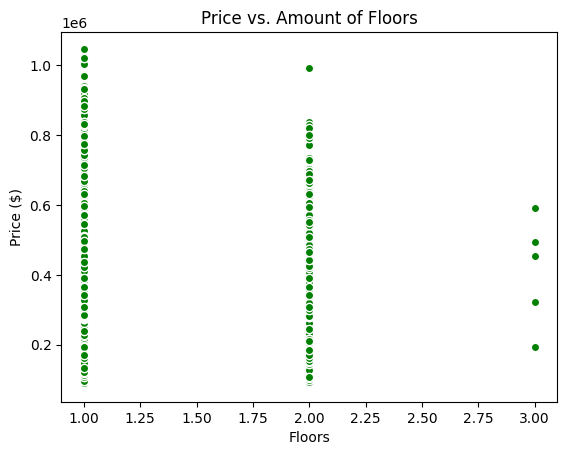

In [17]:
plt.scatter(df['Floors'], df['Price'], color='green', edgecolor='white')
plt.xlabel("Floors")
plt.ylabel("Price ($)")
plt.title("Price vs. Amount of Floors")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X = df[['SquareFootage', 'BackyardSpace', 'NumBedrooms', 'CrimeRate', 'AgeOfHome', 'Floors']] 
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv("training_data.csv", index=False)
test_df.to_csv("testing_data.csv", index=False)

print("Data successfully split and saved")

Data successfully split and saved


In [19]:
print(X_train.columns)  # Check training features
print(X_test.columns)   # Check testing features

Index(['SquareFootage', 'BackyardSpace', 'NumBedrooms', 'CrimeRate',
       'AgeOfHome', 'Floors'],
      dtype='object')
Index(['SquareFootage', 'BackyardSpace', 'NumBedrooms', 'CrimeRate',
       'AgeOfHome', 'Floors'],
      dtype='object')


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
predictions = lm.predict(X_test)

<Axes: ylabel='Price'>

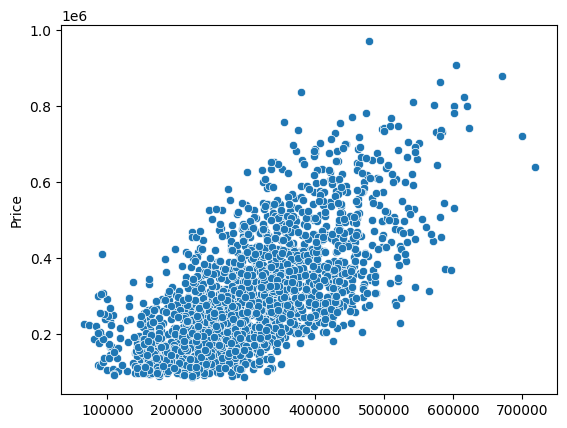

In [24]:
sns.scatterplot(x=predictions, y=y_test)

In [25]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

train_df = pd.read_csv("training_data.csv")

X = train_df.drop(columns=["Price"])
y = train_df["Price"] 

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())  

while True:
    p_values = model.pvalues.drop("const")
    
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        worst_feature = p_values.idxmax()
        print(f"Removing feature: {worst_feature} (p-value: {max_p_value:.4f})")
        X = X.drop(columns=[worst_feature])
        model = sm.OLS(y, X).fit()
    else:
        break

print("\nFinal Model Summary:")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     730.9
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:24:02   Log-Likelihood:                -63820.
No. Observations:                4900   AIC:                         1.277e+05
Df Residuals:                    4893   BIC:                         1.277e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.846e+04   9153.376     -5.294

In [30]:
train_df = pd.read_csv("training_data.csv")

X = train_df.drop(columns=["Price", "BackyardSpace", "Floors", "NumBedrooms", "AgeOfHome", "CrimeRate"])
y = train_df["Price"] 

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     2030.
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:59:05   Log-Likelihood:                -64538.
No. Observations:                4900   AIC:                         1.291e+05
Df Residuals:                    4898   BIC:                         1.291e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.064e+05   4840.963     21.969

In [26]:
from sklearn.metrics import mean_squared_error
import math

y_train_pred = model.predict(X)

mse_train = mean_squared_error(y, y_train_pred)

print("Mean Squared Error (MSE) on Training Set:", mse_train)

Mean Squared Error (MSE) on Training Set: 12043320000.380249


In [35]:
X_test = test_df[['SquareFootage', 'CrimeRate', "NumBedrooms", "AgeOfHome"]]
y_test = test_df['Price']

#Add constant to test set
X_test = sm.add_constant(X_test)

#Run prediction on optimized model
y_test_pred = model.predict(X_test)

y_test_pred

0       4.436632e+06
1       1.963359e+06
2       3.603343e+06
3       2.253147e+06
4       3.190966e+06
            ...     
2095    2.590974e+06
2096    2.141083e+06
2097    2.402000e+06
2098    2.624995e+06
2099    9.723052e+05
Length: 2100, dtype: float64

In [36]:
predictions_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_test_pred})

# Display new dataframe
predictions_df

,Actual Price,Predicted Price
0,588317.65680,4.436632e+06
1,104021.66790,1.963359e+06
2,185708.25980,3.603343e+06
3,128945.46640,2.253147e+06
4,343116.75130,3.190966e+06
...,...,...
2095,354524.71110,2.590974e+06
2096,158471.75140,2.141083e+06
2097,369438.14390,2.402000e+06
2098,90122.38554,2.624995e+06


In [37]:
mse = mean_squared_error(predictions_df['Actual Price'], predictions_df['Predicted Price'])

mse

4234864483105.485

In [42]:
print(test_df.columns)

Index(['Price', 'SquareFootage', 'BackyardSpace'], dtype='object')


In [27]:
test_df = pd.read_csv(r"C:\Users\Nathan\Documents\WGU\D600\Code\Task 1\testing_data.csv")

X_test = test_df[['SquareFootage', 'CrimeRate', "NumBedrooms", "AgeOfHome"]]
X_test = sm.add_constant(X_test)
y_test = test_df['Price']

y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Squared Error (MSE) on Test Set:", mse_test)

Mean Squared Error (MSE) on Test Set: 4234864483105.485


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

train_df = pd.read_csv("training_data.csv")

X = train_df.drop(columns=["Price"]) 
y = train_df["Price"]

X = sm.add_constant(X)

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif = calculate_vif(X)

print("Variance Inflation Factors (VIF):")
print(vif)

Variance Inflation Factors (VIF):
        Variable        VIF
0          const  34.060788
1  SquareFootage   1.023870
2  BackyardSpace   1.014475
3    NumBedrooms   1.020225
4      CrimeRate   1.004697
5      AgeOfHome   1.018218
6         Floors   1.000220
